No comparison file found. Running single-file mode.
Estimated Natural Frequency (Primary): 1.89 Hz


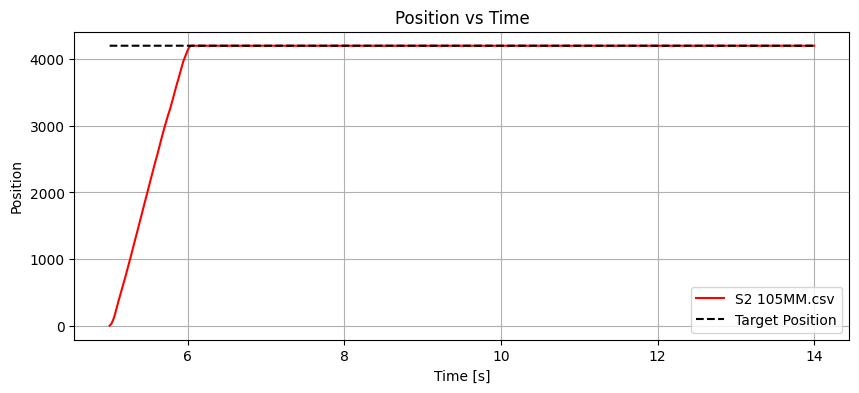

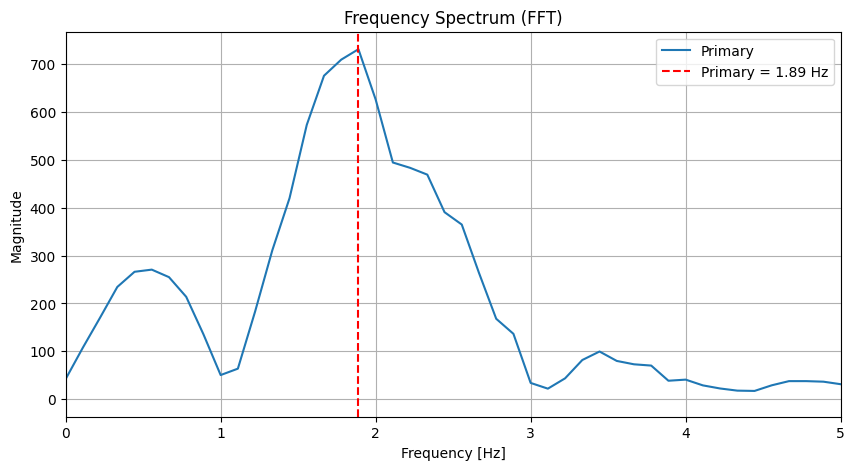

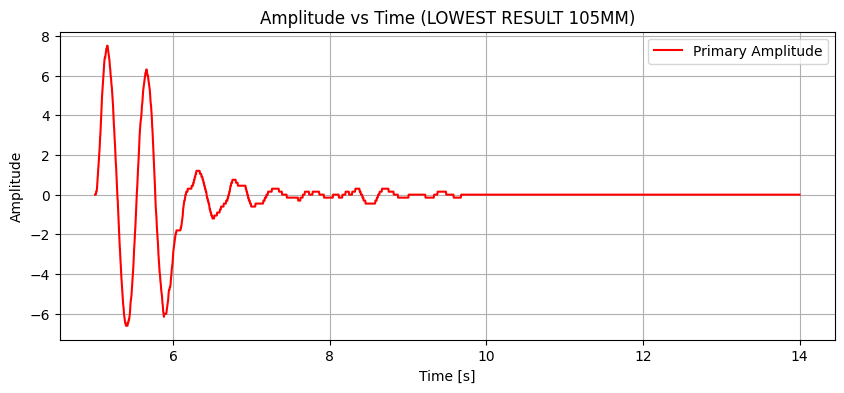

In [9]:
# Milestone 2 - Scenario 1
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import find_peaks
import os

# ---------------------- Configuration ----------------------
data_filename = 'Milestone 2 Deliverables\S2\S2 105MM.csv'        # primary file
compare_filename = r''                # leave blank for single-file mode

# ---------------------- Load Data ----------------------
data = pd.read_csv(data_filename, header=None, skiprows=2,
                   names=['Time', 'Step', 'Amplitude', 'Target Step'])

has_compare = bool(compare_filename) and os.path.exists(compare_filename)
if has_compare:
    data2 = pd.read_csv(compare_filename, header=None, skiprows=2,
                        names=['Time', 'Step', 'Amplitude', 'Target Step'])
    print(f"Loaded comparison file: {compare_filename}")
else:
    print("No comparison file found. Running single-file mode.")

# ---------------------- Convert Time ----------------------
if data['Time'].max() > 1000:
    data['Time'] = data['Time'] / 1000.0
if has_compare and data2['Time'].max() > 1000:
    data2['Time'] = data2['Time'] / 1000.0

# ---------------------- Primary FFT Analysis ----------------------
y = data['Amplitude'].values
dt = np.mean(np.diff(data['Time']))
Fs = 1.0 / dt
N = len(y)

Y = np.fft.fft(y)
freqs = np.fft.fftfreq(N, d=dt)
positive_freqs = freqs[:N // 2]
magnitude = np.abs(Y[:N // 2])

dominant_idx = np.argmax(magnitude)
natural_frequency = positive_freqs[dominant_idx]
print(f"Estimated Natural Frequency (Primary): {natural_frequency:.2f} Hz")

# ---------------------- Comparison FFT Analysis (if available) ----------------------
if has_compare:
    y2 = data2['Amplitude'].values
    dt2 = np.mean(np.diff(data2['Time']))
    Fs2 = 1.0 / dt2
    N2 = len(y2)

    Y2 = np.fft.fft(y2)
    freqs2 = np.fft.fftfreq(N2, d=dt2)
    positive_freqs2 = freqs2[:N2 // 2]
    magnitude2 = np.abs(Y2[:N2 // 2])

    dominant_idx2 = np.argmax(magnitude2)
    natural_frequency2 = positive_freqs2[dominant_idx2]
    print(f"Estimated Natural Frequency (Comparison): {natural_frequency2:.2f} Hz")

    # Compute amplitude zone bounds (20% of peak amplitude in data2)
    peak_amp = np.max(np.abs(y2))
    upper_bound = 0.2 * peak_amp
    lower_bound = -0.2 * peak_amp

# ---------------------- Plot: Position vs Time ----------------------
plt.figure(figsize=(10, 4))
plt.plot(data['Time'], data['Step'], 'r-', label=os.path.basename(data_filename))
if has_compare:
    plt.plot(data2['Time'], data2['Step'], 'b-', label=os.path.basename(compare_filename))
plt.plot(data['Time'], data['Target Step'] * np.ones_like(data['Time']),
         'k--', label='Target Position')
plt.title("Position vs Time")
plt.xlabel("Time [s]")
plt.ylabel("Position")
plt.legend()
plt.grid(True)
plt.show()



# ---------------------- Plot: Frequency Spectrum ----------------------
plt.figure(figsize=(10, 5))
plt.plot(positive_freqs, magnitude, label='Primary')
plt.axvline(natural_frequency, color='r', linestyle='--',
            label=f'Primary = {natural_frequency:.2f} Hz')
if has_compare:
    plt.plot(positive_freqs2, magnitude2, label='Comparison', alpha=0.8)
    plt.axvline(natural_frequency2, color='g', linestyle='--',
                label=f'Comparison = {natural_frequency2:.2f} Hz')
plt.title("Frequency Spectrum (FFT)")
plt.xlabel("Frequency [Hz]")
plt.xlim(0, 5)
plt.ylabel("Magnitude")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------- Plot: Amplitude vs Time ----------------------
plt.figure(figsize=(10, 4))
plt.plot(data['Time'], y, 'r-', label='Primary Amplitude')

if has_compare:
    plt.plot(data2['Time'], data2['Amplitude'], 'b-', label='Comparison Amplitude')
    plt.fill_between(data2['Time'], lower_bound, upper_bound,
                     color='gray', alpha=0.2, label='±20% Amplitude Zone')
plt.title("Amplitude vs Time (LOWEST RESULT 105MM)")
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()
